In [24]:
%matplotlib inline

## Fixing Model Cloud Parameters for Orion A
distance: 414 pc (Menten+ 2007)

thickness: pc

fwhm: km/s

beta:  http://adsabs.harvard.edu/abs/1994ApJ...429..645M

### Calculate Velocity FWHM from NRO Data

In [25]:
from spectral_cube import SpectralCube
from aplpy import FITSFigure
import numpy as np
cubefile12co = "../nro_maps/12CO_20161002_FOREST-BEARS_spheroidal_xyb_grid7.5_0.099kms.fits"
cube = SpectralCube.read(cubefile12co)
mom0_map = cube.moment0()
fwhm_map = cube.linewidth_fwhm() 

3806.766165997258 m / s


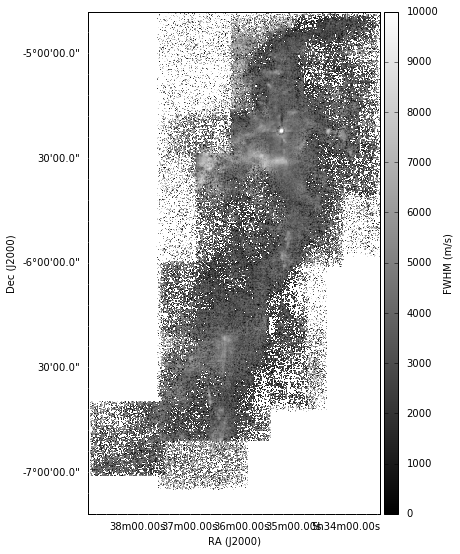

In [26]:
print(np.nanmedian(fwhm_map))

fig = FITSFigure(fwhm_map.hdu)
fig.show_grayscale(vmin=0, vmax=10000)
#fig.recenter(,-6)
fig.show_colorbar()
fig.colorbar.set_axis_label_text("FWHM (m/s)")

### Smooth the Velocity FWHM Map For a Global Estimate of FWHM in Orion A

3916.75638166


INFO: Auto-setting vmin to  2.024e+03 [aplpy.core]
INFO: Auto-setting vmax to  7.875e+03 [aplpy.core]


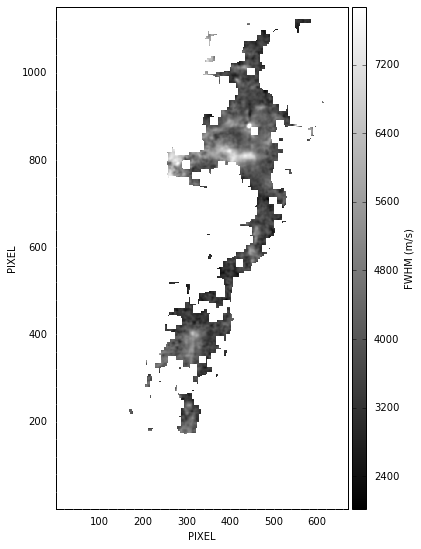

In [37]:
from scipy.ndimage.filters import gaussian_filter
fwhm_smooth = gaussian_filter(fwhm_map.data, 2)
print(np.nanmedian(fwhm_smooth))
fig = FITSFigure(fwhm_smooth)
fig.show_grayscale()
#fig.recenter(,-6)
fig.show_colorbar()
fig.colorbar.set_axis_label_text("FWHM (m/s)")